In [1]:
##Importing The Required Libraries
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

In [2]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')
number_of_classes = 10  #storing the no of classes in a variable
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
##Adding The CNN Layers
#create model
model=Sequential ()

In [4]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [5]:
#flatten the dimension of the image
model.add(Flatten())

In [6]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))


In [7]:
##Compiling The Model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])


In [8]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [9]:
##Train The Model
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 181s 96ms/step - loss: 0.2697 - accuracy: 0.9474 - val_loss: 0.0956 - val_accuracy: 0.9724
Epoch 2/5
1875/1875 [==============================] - 169s 90ms/step - loss: 0.0740 - accuracy: 0.9773 - val_loss: 0.0849 - val_accuracy: 0.9770
Epoch 3/5
1875/1875 [==============================] - 168s 90ms/step - loss: 0.0506 - accuracy: 0.9840 - val_loss: 0.0984 - val_accuracy: 0.9723
Epoch 4/5
1875/1875 [==============================] - 167s 89ms/step - loss: 0.0394 - accuracy: 0.9881 - val_loss: 0.0943 - val_accuracy: 0.9759
Epoch 5/5
1875/1875 [==============================] - 168s 90ms/step - loss: 0.0292 - accuracy: 0.9906 - val_loss: 0.1093 - val_accuracy: 0.9748


In [11]:
##Observing The Metrics
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.10933602601289749, 0.9747999906539917]


In [12]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

1/1 [==============================] - 0s 94ms/step
[[3.2349678e-12 9.1044547e-11 3.7548296e-14 2.3058419e-06 2.9984025e-05
  1.0047121e-06 1.0070949e-10 6.5887527e-04 7.9466467e-05 9.9922836e-01]]


In [21]:
(x_train,y_train),(x_test,y_test) =mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)
(60000,)


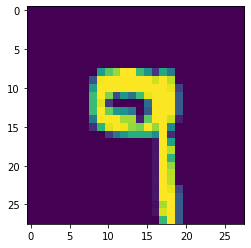

In [23]:
plt.imshow(x_test[6000])

In [15]:
np.argmax(y_test[6000:6001]) #printing the actual labels

9

In [24]:
##Saving The Model
model.save('models/mnistCNN.h5')